Importing necessary modules

In [284]:
import pandas as pd
import numpy as np
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

To find encoding type of input files

In [285]:
with open('companies.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100))
print(result)
with open('rounds2.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100))
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}
{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


Reading csv files to dataframes

In [286]:
companies=pd.read_csv('Desktop/EDA_Assignment/companies.csv', encoding = "ISO-8859-1")
rounds=pd.read_csv('Desktop/EDA_Assignment/rounds2.csv', encoding = "ISO-8859-1")

Understanding the dataset

In [287]:
print(companies.shape)
print(rounds.shape)

(66368, 10)
(114949, 6)


In [288]:
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [289]:
rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


There are missing data in columns 'funding_round_code' and 'raised_amount_usd' since dataframe has shape (114949,6)

In [290]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [291]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


Ideally permalink column should be the unique for company dataframe as it has 66368 values. To confirm all the values are unique by below command

In [292]:
companies['permalink']=companies['permalink'].str.lower()
len(companies['permalink'].unique())

66368

Since all values are unique the column 'permalink'is used as unique key and there are 66368 unique companies in companies dataframe

In [293]:
len(rounds.company_permalink.unique())

90247

In [294]:
rounds['company_permalink'] = rounds['company_permalink'].str.lower()
len(rounds['company_permalink'].unique())

66370

We have two 66370 unique companies in rounds dataframe ie  2 companies which are present only in rounds dataframe and not in companies dataframe , finding which are those companies in below cells 

In [295]:
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']),:]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


The above records rows when seen in excel shows actual data not special characters upon search relevant docs found below solution

In [175]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
...,...,...,...,...,...,...
110545,/organization/whodats-spaces,/funding-round/d5d6db3d1e6c54d71a63b3aa0c9278e6,seed,NaN,28-10-2014,30000.0
113839,/organization/zengame-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0


In [176]:
len(rounds.company_permalink.unique())

66368

doing the same for companies dataframe

In [301]:
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
43,/organization/10north,10Â°North,NaN,Fashion,operating,CAN,ON,Toronto,Mississauga,05-01-2013
426,/organization/51wofang-,51wofang æ å¿§ææ¿,http://www.51wofang.com,NaN,closed,NaN,NaN,NaN,NaN,01-01-2014
1506,/organization/adslinked,AdsLinkedâ¢,http://www.adslinked.com,Advertising|Internet,operating,NaN,NaN,NaN,NaN,NaN
1775,/organization/aesthetic-everything-social-network,Aesthetic EverythingÂ® Social Network,http://aestheticeverything.com/,Public Relations,operating,USA,CA,Los Angeles,Marina Del Rey,15-06-2009
1834,/organization/affluent-attach-club-2,Affluent AttachÃ© Club,http://www.affluentattache.com/,Hospitality,operating,USA,CA,Los Angeles,Beverly Hills,NaN
...,...,...,...,...,...,...,...,...,...,...
63833,/organization/whodats-spaces,Whodatâs Spaces,NaN,Apps,operating,NaN,NaN,NaN,NaN,NaN
65778,/organization/zengame-,ZenGame ç¦ æ¸¸ç§æ,http://www.zen-game.com,Internet|Mobile Games|Online Gaming,closed,NaN,NaN,NaN,NaN,17-07-2010
66365,/organization/eron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/asys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [298]:
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [300]:
rounds.to_csv("rounds_clean.csv", sep=',', index=False)

companies.to_csv("companies_clean.csv", sep='\t', index=False)

After Data cleaning with respect to special characters is done

Since input csv files are not to be tampered writing into new files

In [180]:
rounds = pd.read_csv("rounds_clean.csv", encoding = "ISO-8859-1")
companies = pd.read_csv("companies_clean.csv", sep="\t", encoding = "ISO-8859-1")

In [181]:
print(len(rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]))

0


Merging two dataframes to single master_frame

In [182]:
masterdf=pd.merge(companies, rounds, how='inner', left_on='permalink', right_on='company_permalink')
masterdf.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [183]:
masterdf = masterdf.drop(['company_permalink'],axis=1)
masterdf.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [184]:
masterdf.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

Calculating percentage of missing values for columns to decide on imputing or deletion 

In [185]:
(masterdf.isnull().sum()/len(masterdf.index))* 100

permalink                   0.000000
name                        0.000870
homepage_url                5.336280
category_list               2.966533
status                      0.000000
country_code                7.549435
state_code                  9.522484
region                      8.844792
city                        8.842182
founded_at                 17.852265
funding_round_permalink     0.000000
funding_round_type          0.000000
funding_round_code         72.909725
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

'funding_round_code' column is useless with 73% missing values.
location identifier columns like 'country_code', 'state_code', 'region','city' are of no use in given assignment context. 'founded_at' and 'homepage_url' are also of no use.
'raised_amount_usd' and 'category_list' are required for the case study

In [186]:
masterdf= masterdf.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
masterdf.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [187]:
(masterdf.isnull().sum()/len(masterdf.index))* 100

permalink                   0.000000
name                        0.000870
category_list               2.966533
status                      0.000000
country_code                7.549435
funding_round_permalink     0.000000
funding_round_type          0.000000
funded_at                   0.000000
raised_amount_usd          17.390321
dtype: float64

In [188]:
masterdf['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [189]:
print(masterdf['raised_amount_usd'].median())
print(masterdf['raised_amount_usd'].mean())
print(masterdf.shape)

1680511.0
10426869.33450226
(114949, 9)


The difference in mean and median is huge(10 million and 1 million) which suggests existance of outliers.
And also the data is a huge spread which can be seen from difference in min and max values.
So dropping off the rows with missing values.


In [190]:
masterdf= masterdf[~np.isnan(masterdf['raised_amount_usd'])]

In [191]:
masterdf['country_code'].value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
IRN        1
PSE        1
SEN        1
MKD        1
MNE        1
Name: country_code, Length: 134, dtype: int64

In [192]:
(masterdf['country_code'].value_counts()/len(masterdf.index))* 100

USA    65.342937
GBR     5.285439
CAN     2.754873
CHN     2.029297
IND     1.736539
         ...    
IRN     0.001053
PSE     0.001053
SEN     0.001053
MKD     0.001053
MNE     0.001053
Name: country_code, Length: 134, dtype: float64

country_code is of type category hence either we can remove null value rows or impute with mode(Most frequently occuring value) which in this case is USA  

In [193]:
masterdf =masterdf[~pd.isnull(masterdf['country_code'])]
masterdf =masterdf[~pd.isnull(masterdf['category_list'])]
(masterdf.isnull().sum()/len(masterdf.index))* 100

permalink                  0.00000
name                       0.00113
category_list              0.00000
status                     0.00000
country_code               0.00000
funding_round_permalink    0.00000
funding_round_type         0.00000
funded_at                  0.00000
raised_amount_usd          0.00000
dtype: float64

In [194]:
masterdf.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
6,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [195]:
masterdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88529 non-null  object 
 1   name                     88528 non-null  object 
 2   category_list            88529 non-null  object 
 3   status                   88529 non-null  object 
 4   country_code             88529 non-null  object 
 5   funding_round_permalink  88529 non-null  object 
 6   funding_round_type       88529 non-null  object 
 7   funded_at                88529 non-null  object 
 8   raised_amount_usd        88529 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [196]:
100*(len(masterdf.index) / len(rounds.index))

77.01589400516751

In [197]:
masterdf.to_csv("masterdf.csv", sep=',', index=False)

In [198]:
funddf=pd.read_csv("masterdf.csv", sep=",", encoding="ISO-8859-1")
funddf.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [200]:
funddf['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

Now point of interest is 'seed','angel', 'venture' and 'private_equity' funding types so filtering data to this values 

In [201]:
funddf = funddf[(funddf.funding_round_type == "venture") | 
        (funddf.funding_round_type == "angel") | 
        (funddf.funding_round_type == "seed") | 
        (funddf.funding_round_type == "private_equity") ]

In [202]:
funddf.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

In [203]:
funddf.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False)

funding_round_type
private_equity    7.393849e+07
venture           1.172422e+07
angel             9.715739e+05
seed              7.477937e+05
Name: raised_amount_usd, dtype: float64

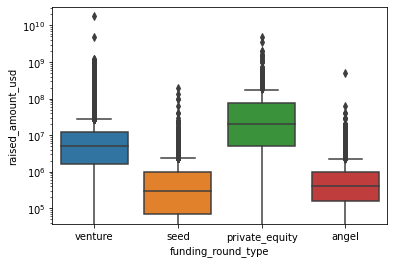

In [282]:
sns.boxplot(x='funding_round_type', y='raised_amount_usd', data=funddf)
plt.yscale('log')
plt.show()

There is a large difference between mean and median for all funding types.


Choosing median to represent the amount for funding type

The constraint says to select funding type with investment in the range of 5 - 15 million.  So selecting 'venture' as investment type.

#CHECKPOINT 3: COUNTRY ANALYSIS


1.Filtering to records with investment type 'venture'
2.sum of investment made in each country
3.Top invested countries

In [211]:
df =funddf[funddf['funding_round_type']=="venture"]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0


In [212]:
tempdf=df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
print(tempdf)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
           ...     
MCO    6.570000e+05
SAU    5.000000e+05
CMR    3.595610e+05
GTM    3.000000e+05
MMR    2.000000e+05
Name: raised_amount_usd, Length: 97, dtype: float64


In [213]:
top9=tempdf[:9]
top9

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

Above are top 9 invested countries. After consultation with wikipedia the three English speaking countries are USA-United States of America, GBR- United Kingdom and IND-India.

In [215]:
df = df[(df.country_code=='USA') | (df.country_code=='GBR') | (df.country_code=='IND')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 88518
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38803 non-null  object 
 1   name                     38803 non-null  object 
 2   category_list            38803 non-null  object 
 3   status                   38803 non-null  object 
 4   country_code             38803 non-null  object 
 5   funding_round_permalink  38803 non-null  object 
 6   funding_round_type       38803 non-null  object 
 7   funded_at                38803 non-null  object 
 8   raised_amount_usd        38803 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


CHECKPOINT 4: SECTOR ANALYSIS 1

Selecting only first value from category_list column

In [218]:
df.loc[:, ['final_category']]=df['category_list'].apply(lambda x:x.split("|")[0])
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,final_category
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
15,/organization/1-mainstream,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


1. Reading mapping csv file to dataframe 2. Dealing with missing values 

In [220]:
mapping = pd.read_csv("Desktop/EDA_Assignment/mapping.csv", sep=",")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [221]:
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [222]:
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [223]:
print(df.columns)
print(mapping.columns)

Index(['permalink', 'name', 'category_list', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'final_category'],
      dtype='object')
Index(['category_list', 'Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')


Mapping 'final_category' sector to one of the eight main sectors

converting wide dataframe mapping to long dataframe mapping

In [224]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index: bool = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``fram

In [225]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [235]:
valuevars=mapping.columns[1:10]
valuevars

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')

In [236]:
indexvars=np.setdiff1d(mapping.columns, valuevars)
indexvars

array(['category_list'], dtype=object)

In [238]:
longmappingdf=pd.melt(mapping, id_vars=list(indexvars), value_vars=list(valuevars))
longmappingdf.head(10)

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
5,Ad Targeting,Automotive & Sports,0
6,Advanced Materials,Automotive & Sports,0
7,Adventure Travel,Automotive & Sports,1
8,Advertising,Automotive & Sports,0
9,Advertising Exchanges,Automotive & Sports,0


In [239]:
longmappingdf = longmappingdf[longmappingdf['value']==1]
longmappingdf = longmappingdf.drop('value', axis=1)

In [241]:
longmappingdf.head()


,category_list,variable
7,Adventure Travel,Automotive & Sports
13,Aerospace,Automotive & Sports
44,Auto,Automotive & Sports
45,Automated Kiosk,Automotive & Sports
46,Automotive,Automotive & Sports


In [242]:
len(longmappingdf)

687

In [243]:
longmappingdf = longmappingdf.rename(columns={'variable': 'sector'})

In [245]:
longmappingdf['category_list'] = longmappingdf['category_list'].str.lower()
df['final_category'] = df['final_category'].str.lower()

To merge 'final_mapping' values should be present in 'category_list' column of longmapping dataframe

In [251]:
longmappingdf['category_list'] = longmappingdf['category_list'].str.lower()
df['final_category'] = df['final_category'].str.lower()

In [252]:
df[~df['final_category'].isin(longmappingdf['category_list'])]

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,final_category
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,Analytics,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,Analytics|Big Data|Enterprise Software|Market ...,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
...,...,...,...,...,...,...,...,...,...,...
88270,/organization/zoopla,Zoopla,Property Management|Real Estate,ipo,GBR,/funding-round/98da1f441a55c9a9629a256828923e38,venture,19-01-2009,5440000.0,property management
88291,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,finance
88292,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,finance
88293,/organization/zopa,Zopa,Finance|FinTech,operating,GBR,/funding-round/54dbfbd899caf7d1d4b2b7676065f303,venture,01-07-2006,5000000.0,finance


In [253]:
longmappingdf[~longmappingdf['category_list'].isin(df['final_category'])][:20]

,category_list,sector
68,boating industry,Automotive & Sports
656,unmanned air systems,Automotive & Sports
1389,air pollution control,Cleantech / Semiconductors
1406,aquaculture,Cleantech / Semiconductors
1437,biomass power generation,Cleantech / Semiconductors
1613,energy ma0gement,Cleantech / Semiconductors
1614,energy storage,Cleantech / Semiconductors
1664,fuel cells,Cleantech / Semiconductors
1666,funeral industry,Cleantech / Semiconductors
1688,green,Cleantech / Semiconductors


 0tural language processing ,0tural language processing contact ma0gement, digital sig0ge,digital sig0ge, document ma0gement are values present in category_list column which is not logical

In [254]:
longmappingdf['category_list'] = longmappingdf['category_list'].apply(lambda x: x.replace('0', 'na'))
print(longmappingdf['category_list'])

7        adventure travel
13              aerospace
44                   auto
45        automated kiosk
46             automotive
              ...        
6112    social recruiting
6113    social television
6114        social travel
6125      stock exchanges
6158      venture capital
Name: category_list, Length: 687, dtype: object


In [255]:
df = pd.merge(df, longmappingdf, how='inner', left_on='final_category', right_on='category_list')
df.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,final_category,category_list_y,sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,Entertainment


In [257]:
df = df.drop('category_list_y', axis=1)
df.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,final_category,sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Entertainment
3,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment


In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38788 non-null  object 
 1   name                     38788 non-null  object 
 2   category_list_x          38788 non-null  object 
 3   status                   38788 non-null  object 
 4   country_code             38788 non-null  object 
 5   funding_round_permalink  38788 non-null  object 
 6   funding_round_type       38788 non-null  object 
 7   funded_at                38788 non-null  object 
 8   raised_amount_usd        38788 non-null  float64
 9   final_category           38788 non-null  object 
 10  sector                   38788 non-null  object 
dtypes: float64(1), object(10)
memory usage: 3.6+ MB


In [273]:
finaldf = df[(df['raised_amount_usd'] >= 5000000) & (df['raised_amount_usd'] <= 15000000)]
finaldf.head()

,permalink,name,category_list_x,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,final_category,sector
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,Entertainment
1,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,Entertainment
2,/organization/90min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,Entertainment
4,/organization/all-def-digital,All Def Digital,Media,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,Entertainment
14,/organization/chefs-feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,media,Entertainment


In [265]:
finaldf.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum']).

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

In [281]:
print(finaldf.groupby(['country_code']).raised_amount_usd.agg(['count','sum']))

              count           sum
country_code                     
GBR             621  5.379079e+09
IND             328  2.949544e+09
USA           12063  1.077571e+11


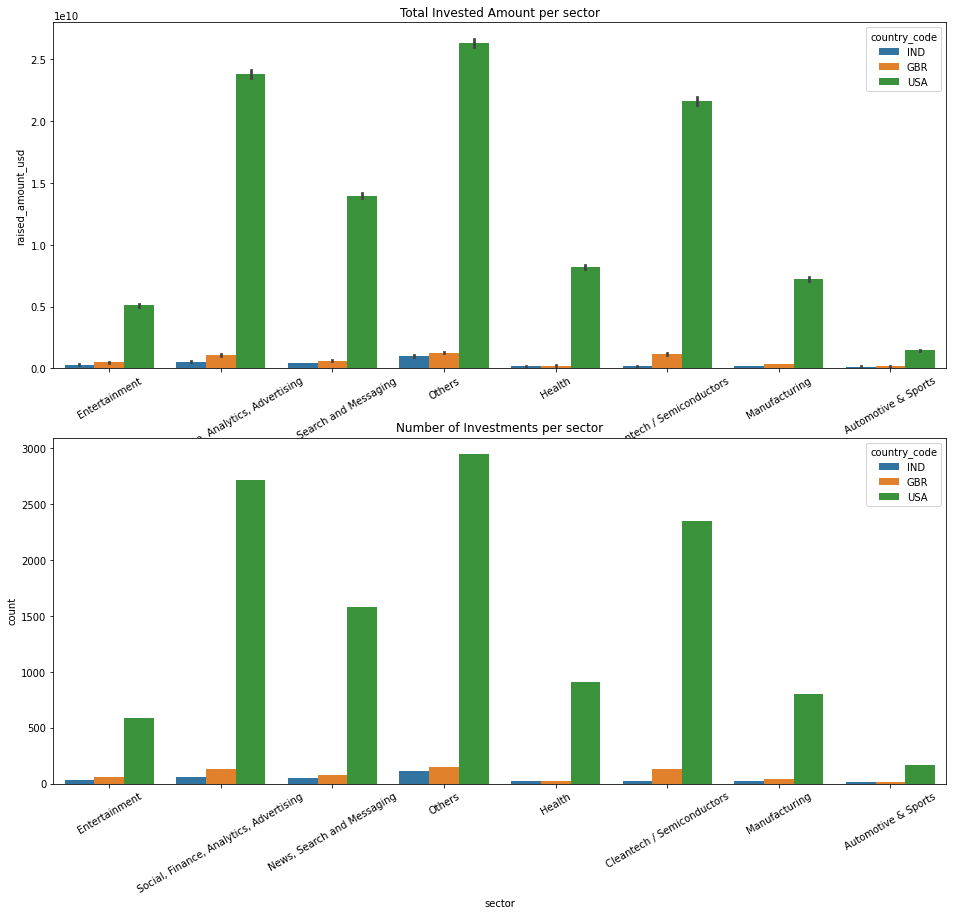

In [283]:
plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=finaldf, estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount per sector')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=finaldf)
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments per sector')


plt.show()

In [302]:
pwd

'/Users/z003zhj'